# Data Science for Construction, Architecture and Engineering

### Week 4 - Operations - Pandas Statistics and Visualization

### Exercise Set 4.2 - Pandas Stats and Viz II

This set of exercises is related to the second half of Week 4 videos. Using the same data (Thermal Comfort Database II) and packages (Pandas) as in the videos, we will learn how to find comfortable temperature for occupants and compare the different scenarios.

There is an introduction video available to explain the process of using this exercise video.

The lead developer of this exercise is Chun Fu, a Ph.D. student at NUS and a teaching assistant of this course. 

#### Setup the environment

Let's set up the environment and read the data first:

In [1]:
# import packages
import pandas as pd
#from google.colab import drive
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# setting path for data source
# drive.mount('/content/gdrive')
# os.chdir("/content/gdrive/My Drive/EDX Data Science for Construction, Architecture and Engineering/Week 4 - Operations - Statistics and Visualization/")

In [3]:
# load thermal comfort database
ieq_data = pd.read_csv("ashrae_thermal_comfort_database_2.csv", index_col='Unnamed: 0')

In [4]:
ieq_data

,Publication (Citation),Year,Season,Climate,City,Country,Building type,Cooling startegy_building level,Sex,Thermal sensation,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),ThermalSensation_rounded
2233,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Female,-2.0,0.75,1.00,25.2,64.0,0.10,-2.0
2234,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,-1.0,0.64,1.00,25.2,64.0,0.10,-1.0
2235,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,-2.0,0.64,1.00,25.2,64.0,0.10,-2.0
2236,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Female,-2.0,0.75,1.00,25.2,64.0,0.10,-2.0
2237,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,0.0,0.72,1.00,25.2,64.0,0.10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104027,"Cena, K. and de Dear, R. (1999) ""Field Study o...",1997.0,Summer,Hot semi-arid,Kalgoorlie,Australia,Office,Air Conditioned,Female,2.3,0.45,1.20,24.7,31.4,0.21,2.0
104030,"Cena, K. and de Dear, R. (1999) ""Field Study o...",1997.0,Summer,Hot semi-arid,Kalgoorlie,Australia,Office,Air Conditioned,Female,2.0,0.42,1.40,25.2,30.2,0.12,2.0
104031,"Cena, K. and de Dear, R. (1999) ""Field Study o...",1997.0,Summer,Hot semi-arid,Kalgoorlie,Australia,Office,Air Conditioned,Female,0.2,0.53,1.25,25.4,29.3,0.14,0.0
104032,"Cena, K. and de Dear, R. (1999) ""Field Study o...",1997.0,Summer,Hot semi-arid,Kalgoorlie,Australia,Office,Air Conditioned,Female,1.0,0.57,1.27,25.3,30.1,0.23,1.0


## Thermal Sensation Example

In the last exercise, we looked mostly at how to transform the `ieq_data` DataFrame is different ways. In this exercise, we will focus much more on the `Thermal sensation` variable. This subjective feedback data point is the thermal sensation vote from the various participants in the research studies in the data set. This variable has a value from -3 (cold) to +3 (hot), which is used to infer occupant thermal satisfaction -- `Thermal sensation`.

As shown in the following table, when the `Thermal sensation` is 0, the occupant will not feel cold or hot (neutral).

**Therefore, when the thermal sensation is 0, we can consider it as a `comfortable condition`**

|   Thermal sensation | Definition    |
|-------------------:|:--------------|
|                  3 | Hot           |
|                  2 | Warm          |
|                  1 | Slightly warm |
|                  0 | Neutral       |
|                 -1 | Slightly cool |
|                 -2 | Cool          |
|                 -3 | Cold          |

Before we get into the exercises, let's look at an example of how we can use this variable find different types of insight. In the figure below, we have created a visualization that shows the `Air temperature (C)` has significantly different distributions under different `Thermal sensation`.

For example, when `thermal sensation` is 0, `Air temperature (C)` is about 23 ~ 26 degrees (seeing boxplot body that covers 50% of the data)

In other words, the air temperature of 23 to 26 degrees is probably the range where most people will feel comfortable.

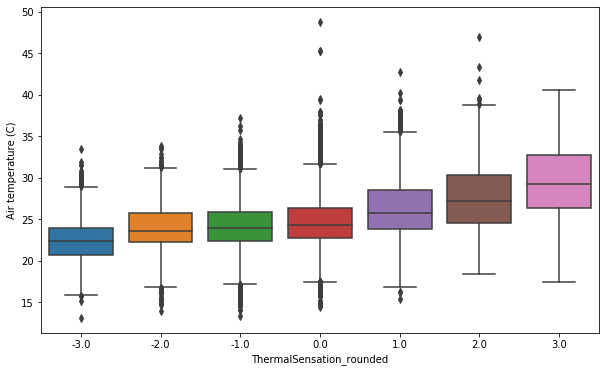

In [5]:
# boxplot for Air temperature (C) under different Thermal sensation
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
sns.boxplot(x="ThermalSensation_rounded", y="Air temperature (C)", data=ieq_data)
plt.show()

## Exercise 04.2.1 -- At what temperature do people feel `neutral` in different *types of buildings*?

In this first exercise, let's try to figure out which range of air temperatures were measured when the participants indicated that they felt thermally neutral (`ThermalSensation_rounded` = 0) for each of the different `Building types`.

The question you can answer with this exercise would be: in terms of median, what is the order of comfortable air temperature from large to small?
1. Multifamily housing > Classroom > Office > Others > Senior centor
2. Classroom > Multifamily housing > Office > Others > Senior centor
3. Office > Senior centor > Classroom > Multifamily housing > Others 
4. Senior centor > Office > Classroom > Multifamily housing > Others 

The first step is to create a new DataFrame that only has data for neutral thermal sensations. Next you can create a visualization to show the distribution of temperature for each of the building types. Hints are added to the comments of the next two coding cells.

In [6]:
ieq_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43448 entries, 2233 to 104033
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Publication (Citation)           43448 non-null  object 
 1   Year                             43448 non-null  float64
 2   Season                           43448 non-null  object 
 3   Climate                          43448 non-null  object 
 4   City                             43448 non-null  object 
 5   Country                          43448 non-null  object 
 6   Building type                    43448 non-null  object 
 7   Cooling startegy_building level  43448 non-null  object 
 8   Sex                              43448 non-null  object 
 9   Thermal sensation                43448 non-null  float64
 10  Clo                              43448 non-null  float64
 11  Met                              43448 non-null  float64
 12  Air temperatur

In [7]:
ieq_data.columns

Index(['Publication (Citation)', 'Year', 'Season', 'Climate', 'City',
       'Country', 'Building type', 'Cooling startegy_building level', 'Sex',
       'Thermal sensation', 'Clo', 'Met', 'Air temperature (C)',
       'Relative humidity (%)', 'Air velocity (m/s)',
       'ThermalSensation_rounded'],
      dtype='object')

In [8]:
# YOUR CODE HERE to select data where "thermal sensation=0"
thermalneutral = ieq_data[ieq_data['ThermalSensation_rounded'] == 0.0]
thermalneutral

,Publication (Citation),Year,Season,Climate,City,Country,Building type,Cooling startegy_building level,Sex,Thermal sensation,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),ThermalSensation_rounded
2237,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,0.0,0.72,1.00,25.2,64.0,0.10,0.0
2239,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,0.0,0.64,1.00,25.2,64.0,0.10,0.0
2243,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,0.0,0.64,1.00,26.9,63.0,0.02,0.0
2245,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,0.0,0.72,1.00,26.9,63.0,0.02,0.0
2246,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,0.0,0.72,1.00,26.9,63.0,0.02,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103988,"Cena, K. and de Dear, R. (1999) ""Field Study o...",1997.0,Summer,Hot semi-arid,Kalgoorlie,Australia,Office,Air Conditioned,Female,0.5,0.62,1.50,25.9,29.0,0.23,0.0
104006,"Cena, K. and de Dear, R. (1999) ""Field Study o...",1997.0,Summer,Hot semi-arid,Kalgoorlie,Australia,Office,Air Conditioned,Female,0.0,0.44,1.42,22.3,42.1,0.17,0.0
104012,"Cena, K. and de Dear, R. (1999) ""Field Study o...",1997.0,Summer,Hot semi-arid,Kalgoorlie,Australia,Office,Air Conditioned,Female,-0.3,0.40,1.60,22.4,39.3,0.14,-0.0
104022,"Cena, K. and de Dear, R. (1999) ""Field Study o...",1997.0,Summer,Hot semi-arid,Kalgoorlie,Australia,Office,Air Conditioned,Female,0.0,0.48,1.12,25.2,27.9,0.23,0.0


In [9]:
thermalneutral.describe()

,Year,Thermal sensation,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),ThermalSensation_rounded
count,19537.000000,19537.000000,19537.000000,19537.000000,19537.000000,19537.000000,19537.000000,19537.0
mean,2003.682961,-0.002677,0.651049,1.186054,24.700215,52.622020,0.193377,0.0
std,10.020138,0.120462,0.272337,0.246516,2.979912,14.762311,0.314589,0.0
min,1982.000000,-0.500000,0.050000,0.700000,14.400000,0.500000,0.000000,0.0
25%,1997.000000,0.000000,0.490000,1.000000,22.800000,42.600000,0.050000,0.0
50%,2010.000000,0.000000,0.620000,1.100000,24.300000,53.000000,0.100000,0.0
75%,2012.000000,0.000000,0.730000,1.200000,26.400000,63.400000,0.200000,0.0
max,2016.000000,0.500000,2.800000,4.500000,48.800000,97.800000,6.540000,0.0


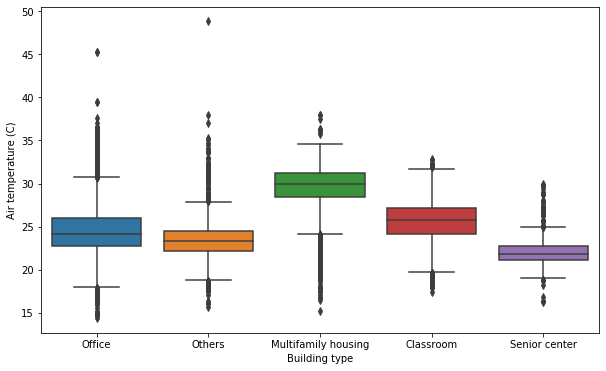

In [10]:
# YOUR CODE HERE (Hint: You could either use boxplot or groupby to get the answer)
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
sns.boxplot(x="Building type", y="Air temperature (C)", data=thermalneutral)
plt.show()

## Exercise 04.2.2 - At what temperature do people feel `neutral` with different *system types*?

How about the comfortable air temperature (thermal sensation = 0) in different `Cooling startegy_building level`?

In terms of median, what is the order of comfortable air temperature from large to small?
1. Naturally Ventilated > Mixed mode > Air conditioned > Mechanically Ventilated
2. Mixed mode > Naturally Ventilated > Mechanically Ventilated > Air conditioned
3. Naturally Ventilated > Mechanically Ventilated > Mixed mode > Air conditioned
4. Naturally Ventilated > Mechanically Ventilated > Air conditioned > Mixed mode

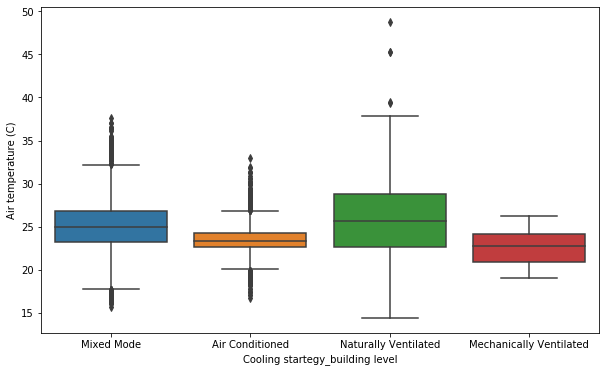

In [11]:
# YOUR CODE HERE (Hint: You could either use boxplot or groupby to get the answer)
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
sns.boxplot(x="Cooling startegy_building level", y="Air temperature (C)", data=thermalneutral)
plt.show()


## Exercise 04.2.3 - Variance Calculation of Different Scenarios - Advanced (Optional)

Based on the question above, we've already known that proper classification can reduce variance (or deviation) of variables, which is great for us to zoom in more details under different conditions.

For example, a thermally neutral air temperature (`ThermalSensation_rounded` = 0) with `Cooling startegy_building level` classification have narrower range than the one without classification, which suggests different comfort ranges in each cooling strategy.

So, to compare which classification has the better performance (i.e., lowest variance). we need to quantify the `total variance` in each DataFrame:


![alt text](https://www.saedsayad.com/images/Clustering_kmeans_c.png)

In the next three code cells, use the *variance* calculation as a way to quantify the diversity of values in various columns:

1. Calculate total variance of "Air temperature (C)" without any classification
2. Calculate total variance of "Air temperature (C)" with "Cooling startegy_building level" classification
3. Calculate total variance of "Air temperature (C)" with "Building type" classification

Hint: You will need to use to multiply the resultant values from the the `.var()` function and the `.count()` function for each of the targeted variables 

In [12]:
thermalneutral

,Publication (Citation),Year,Season,Climate,City,Country,Building type,Cooling startegy_building level,Sex,Thermal sensation,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),ThermalSensation_rounded
2237,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,0.0,0.72,1.00,25.2,64.0,0.10,0.0
2239,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,0.0,0.64,1.00,25.2,64.0,0.10,0.0
2243,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,0.0,0.64,1.00,26.9,63.0,0.02,0.0
2245,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,0.0,0.72,1.00,26.9,63.0,0.02,0.0
2246,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,0.0,0.72,1.00,26.9,63.0,0.02,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103988,"Cena, K. and de Dear, R. (1999) ""Field Study o...",1997.0,Summer,Hot semi-arid,Kalgoorlie,Australia,Office,Air Conditioned,Female,0.5,0.62,1.50,25.9,29.0,0.23,0.0
104006,"Cena, K. and de Dear, R. (1999) ""Field Study o...",1997.0,Summer,Hot semi-arid,Kalgoorlie,Australia,Office,Air Conditioned,Female,0.0,0.44,1.42,22.3,42.1,0.17,0.0
104012,"Cena, K. and de Dear, R. (1999) ""Field Study o...",1997.0,Summer,Hot semi-arid,Kalgoorlie,Australia,Office,Air Conditioned,Female,-0.3,0.40,1.60,22.4,39.3,0.14,-0.0
104022,"Cena, K. and de Dear, R. (1999) ""Field Study o...",1997.0,Summer,Hot semi-arid,Kalgoorlie,Australia,Office,Air Conditioned,Female,0.0,0.48,1.12,25.2,27.9,0.23,0.0


In [13]:
thermalneutral.columns

Index(['Publication (Citation)', 'Year', 'Season', 'Climate', 'City',
       'Country', 'Building type', 'Cooling startegy_building level', 'Sex',
       'Thermal sensation', 'Clo', 'Met', 'Air temperature (C)',
       'Relative humidity (%)', 'Air velocity (m/s)',
       'ThermalSensation_rounded'],
      dtype='object')

In [14]:
thermal = thermalneutral[['Building type', 'Cooling startegy_building level', 'Air temperature (C)']]

In [15]:
thermal

,Building type,Cooling startegy_building level,Air temperature (C)
2237,Office,Mixed Mode,25.2
2239,Office,Mixed Mode,25.2
2243,Office,Mixed Mode,26.9
2245,Office,Mixed Mode,26.9
2246,Office,Mixed Mode,26.9
...,...,...,...
103988,Office,Air Conditioned,25.9
104006,Office,Air Conditioned,22.3
104012,Office,Air Conditioned,22.4
104022,Office,Air Conditioned,25.2


In [16]:
thermal.reset_index(drop=True,inplace=True)

In [17]:
thermal

,Building type,Cooling startegy_building level,Air temperature (C)
0,Office,Mixed Mode,25.2
1,Office,Mixed Mode,25.2
2,Office,Mixed Mode,26.9
3,Office,Mixed Mode,26.9
4,Office,Mixed Mode,26.9
...,...,...,...
19532,Office,Air Conditioned,25.9
19533,Office,Air Conditioned,22.3
19534,Office,Air Conditioned,22.4
19535,Office,Air Conditioned,25.2


In [18]:
thermal.describe()

,Air temperature (C)
count,19537.000000
mean,24.700215
std,2.979912
min,14.400000
25%,22.800000
50%,24.300000
75%,26.400000
max,48.800000


In [19]:
thermal1 = thermal.copy()
thermal1

,Building type,Cooling startegy_building level,Air temperature (C)
0,Office,Mixed Mode,25.2
1,Office,Mixed Mode,25.2
2,Office,Mixed Mode,26.9
3,Office,Mixed Mode,26.9
4,Office,Mixed Mode,26.9
...,...,...,...
19532,Office,Air Conditioned,25.9
19533,Office,Air Conditioned,22.3
19534,Office,Air Conditioned,22.4
19535,Office,Air Conditioned,25.2


In [20]:
# YOUR CODE HERE to calculate total variance of "Air temperature (C)" without any classification
# Because the original var() function in pandas has been normalized by the data points, we need to multiply var() by count()
thermal1['variance'] = thermal1['Air temperature (C)'].var()
thermal1

,Building type,Cooling startegy_building level,Air temperature (C),variance
0,Office,Mixed Mode,25.2,8.879875
1,Office,Mixed Mode,25.2,8.879875
2,Office,Mixed Mode,26.9,8.879875
3,Office,Mixed Mode,26.9,8.879875
4,Office,Mixed Mode,26.9,8.879875
...,...,...,...,...
19532,Office,Air Conditioned,25.9,8.879875
19533,Office,Air Conditioned,22.3,8.879875
19534,Office,Air Conditioned,22.4,8.879875
19535,Office,Air Conditioned,25.2,8.879875


In [21]:
thermal1['count'] = thermal1['Air temperature (C)'].count()
thermal1

,Building type,Cooling startegy_building level,Air temperature (C),variance,count
0,Office,Mixed Mode,25.2,8.879875,19537
1,Office,Mixed Mode,25.2,8.879875,19537
2,Office,Mixed Mode,26.9,8.879875,19537
3,Office,Mixed Mode,26.9,8.879875,19537
4,Office,Mixed Mode,26.9,8.879875,19537
...,...,...,...,...,...
19532,Office,Air Conditioned,25.9,8.879875,19537
19533,Office,Air Conditioned,22.3,8.879875,19537
19534,Office,Air Conditioned,22.4,8.879875,19537
19535,Office,Air Conditioned,25.2,8.879875,19537


In [22]:
thermal1['sum'] = thermal1['variance'] * thermal1['count']
thermal1

,Building type,Cooling startegy_building level,Air temperature (C),variance,count,sum
0,Office,Mixed Mode,25.2,8.879875,19537,173486.118972
1,Office,Mixed Mode,25.2,8.879875,19537,173486.118972
2,Office,Mixed Mode,26.9,8.879875,19537,173486.118972
3,Office,Mixed Mode,26.9,8.879875,19537,173486.118972
4,Office,Mixed Mode,26.9,8.879875,19537,173486.118972
...,...,...,...,...,...,...
19532,Office,Air Conditioned,25.9,8.879875,19537,173486.118972
19533,Office,Air Conditioned,22.3,8.879875,19537,173486.118972
19534,Office,Air Conditioned,22.4,8.879875,19537,173486.118972
19535,Office,Air Conditioned,25.2,8.879875,19537,173486.118972


In [23]:
# YOUR CODE HERE to calculate total variance of "Air temperature (C)" with "Cooling startegy_building level" classification
# Do remember to sum up all variances in each classification
thermal2 = thermal.copy()
thermal2

,Building type,Cooling startegy_building level,Air temperature (C)
0,Office,Mixed Mode,25.2
1,Office,Mixed Mode,25.2
2,Office,Mixed Mode,26.9
3,Office,Mixed Mode,26.9
4,Office,Mixed Mode,26.9
...,...,...,...
19532,Office,Air Conditioned,25.9
19533,Office,Air Conditioned,22.3
19534,Office,Air Conditioned,22.4
19535,Office,Air Conditioned,25.2


In [24]:
df2A = thermal2.groupby("Cooling startegy_building level").count().reset_index()

In [25]:
df2A

,Cooling startegy_building level,Building type,Air temperature (C)
0,Air Conditioned,6341,6341
1,Mechanically Ventilated,49,49
2,Mixed Mode,7511,7511
3,Naturally Ventilated,5636,5636


In [26]:
df2A.rename(columns={'Building type':'count'},inplace=True)

In [27]:
df2A

,Cooling startegy_building level,count,Air temperature (C)
0,Air Conditioned,6341,6341
1,Mechanically Ventilated,49,49
2,Mixed Mode,7511,7511
3,Naturally Ventilated,5636,5636


In [28]:
df2A.drop("Air temperature (C)",axis=1,inplace=True)

In [29]:
df2A

,Cooling startegy_building level,count
0,Air Conditioned,6341
1,Mechanically Ventilated,49
2,Mixed Mode,7511
3,Naturally Ventilated,5636


In [30]:
df2B = thermal2.groupby("Cooling startegy_building level").var().reset_index()

In [31]:
df2B

,Cooling startegy_building level,Air temperature (C)
0,Air Conditioned,2.325182
1,Mechanically Ventilated,3.847917
2,Mixed Mode,8.287292
3,Naturally Ventilated,14.541641


In [32]:
df2B.rename(columns={'Air temperature (C)':'variance'},inplace=True)

In [33]:
df2B

,Cooling startegy_building level,variance
0,Air Conditioned,2.325182
1,Mechanically Ventilated,3.847917
2,Mixed Mode,8.287292
3,Naturally Ventilated,14.541641


In [34]:
df2 = pd.concat([df2A,df2B],axis=1)

In [35]:
df2

,Cooling startegy_building level,count,Cooling startegy_building level,variance
0,Air Conditioned,6341,Air Conditioned,2.325182
1,Mechanically Ventilated,49,Mechanically Ventilated,3.847917
2,Mixed Mode,7511,Mixed Mode,8.287292
3,Naturally Ventilated,5636,Naturally Ventilated,14.541641


In [36]:
df2['sum'] = df2['variance'] * df2['count']
df2

,Cooling startegy_building level,count,Cooling startegy_building level,variance,sum
0,Air Conditioned,6341,Air Conditioned,2.325182,14743.981442
1,Mechanically Ventilated,49,Mechanically Ventilated,3.847917,188.547917
2,Mixed Mode,7511,Mixed Mode,8.287292,62245.852874
3,Naturally Ventilated,5636,Naturally Ventilated,14.541641,81956.689320


In [37]:
# YOUR CODE HERE to calculate total variance of "Air temperature (C)" with "Building type" classification
# Do remember to sum up all variances in each classification
thermal3 = thermal.copy()

In [38]:
df3A = thermal3.groupby("Building type").count().reset_index()

In [39]:
df3A

,Building type,Cooling startegy_building level,Air temperature (C)
0,Classroom,2877,2877
1,Multifamily housing,805,805
2,Office,13466,13466
3,Others,2037,2037
4,Senior center,352,352


In [40]:
df3A.rename(columns={'Cooling startegy_building level':'count'},inplace=True)

In [41]:
df3A

,Building type,count,Air temperature (C)
0,Classroom,2877,2877
1,Multifamily housing,805,805
2,Office,13466,13466
3,Others,2037,2037
4,Senior center,352,352


In [42]:
df3A.drop("Air temperature (C)",axis=1,inplace=True)

In [43]:
df3A

,Building type,count
0,Classroom,2877
1,Multifamily housing,805
2,Office,13466
3,Others,2037
4,Senior center,352


In [44]:
df3B = thermal3.groupby("Building type").var().reset_index()

In [45]:
df3B

,Building type,Air temperature (C)
0,Classroom,6.197613
1,Multifamily housing,14.644812
2,Office,8.053423
3,Others,6.064100
4,Senior center,4.779918


In [46]:
df3B.rename(columns={'Air temperature (C)':'variance'},inplace=True)

In [47]:
df3B

,Building type,variance
0,Classroom,6.197613
1,Multifamily housing,14.644812
2,Office,8.053423
3,Others,6.064100
4,Senior center,4.779918


In [48]:
df3 = pd.concat([df3A,df3B],axis=1)

In [49]:
df3

,Building type,count,Building type,variance
0,Classroom,2877,Classroom,6.197613
1,Multifamily housing,805,Multifamily housing,14.644812
2,Office,13466,Office,8.053423
3,Others,2037,Others,6.064100
4,Senior center,352,Senior center,4.779918


In [50]:
df3['sum'] = df3['variance'] * df3['count']
df3

,Building type,count,Building type,variance,sum
0,Classroom,2877,Classroom,6.197613,17830.533755
1,Multifamily housing,805,Multifamily housing,14.644812,11789.073308
2,Office,13466,Office,8.053423,108447.395456
3,Others,2037,Others,6.064100,12352.572682
4,Senior center,352,Senior center,4.779918,1682.531026


In the next section of this exercise, we will code a process that is a little bit more complex in that it will include the automation of a process that is often done in the process of a machine learning algorithm.

If only considering the classifications of `Climate`, `Season`, `Building type`, `Cooling startegy_building level`, and `Sex`, we want to make the classification from two of them (e.g., classification based on `Climate` and `Building type`) and compare their performance.

What combinations has the best classification performance (meaning the smallest total variance) for `Air temperature (C)`?

First classification:
1. Climate
2. Season
3. Building type
4. Cooling startegy_building level
5. Sex

Second classification:
1. Season
2. Building type
3. Cooling startegy_building level
4. Sex

Hint: Create two `for` loops that iterate over both lists to create all combination of the two classification lists. The calculation is essentially the `.var()` multiplied by the the `.sum()` of the category's `.count()`

In [51]:
# YOUR CODE HERE to calculate total variance of "Air temperature (C)" with "Building type" classification

